In [1]:
#pip install ucimlrepo

# Packages
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

URV                                                                            MESIIA

Neural and Evolutionary Computation (NEC)
Assignment 1: Prediction with Back-Propagation and Linear Regression

Teachers: Dr. Jordi Duch, Dr. Sergio Gomez

Student: Natzaret Gálvez Rísquez

Part 1: Selecting and analyzing the datasets

We perform the predictions on  three datasets: 

In [2]:
# We upload the datasets

# First dataset: File: A1-turbine.txt
    # 5 features: the first 4 are the input variables, the last one is the value to predict
    # 451 patterns: use the first 85% for training and validation, and the remaining 15% for test
df_turbine=pd.read_csv('C:/Users/Gari/Desktop/NEC/A1-turbine.txt', sep='\t', header=None)
header_vector_turbine = df_turbine.iloc[0, :].tolist() #header
df_turbine=df_turbine.iloc[1:,:]
df_turbine=pd.DataFrame(df_turbine)

# Second dataset: File: A1-synthetic.txt
    # 10 features: the first 9 are the input variables, the last one is the value to predict
    # 1000 patterns: use the first 80% for training and validation, and the remaining 20% for test
df_synthetic=pd.read_csv('C:/Users/Gari/Desktop/NEC/A1-synthetic.txt', sep='\t', header=None)
header_vector_synthetic = df_synthetic.iloc[0, :].tolist() #header
df_synthetic=df_synthetic.iloc[1:,:]
df_synthetic=pd.DataFrame(df_synthetic)

# Third dataset: from "https://archive.ics.uci.edu/dataset/186/wine+quality"
    # At least 6 features, one of them used for prediction
    # The prediction variable must take real (float or double) values; it should not represent a categorical value (that would correspond to a classification task)
    # At least 400 patterns
    # Select randomly 80% of the patterns for training and validation, and the remaining 20% for test; it is important to shuffle the original data, to destroy any kind of sorting it could have

# Wine Quality dataset [6497 rows x 11 columns]
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
df_wineQuality = wine_quality.data.features 
y = wine_quality.data.targets #quality of wine, an integer
  
# metadata 
#print(wine_quality.metadata) 
# variable information 
#print(wine_quality.variables) 

header_vector_wineQuality = df_wineQuality.columns.tolist() #header

In [13]:
print("Number of patterns of wine Quality:")
print(len(df_wineQuality)) 

Number of patterns of wine Quality:
6497


In [15]:
# As we can observe by the following header of the wine quality, alcohol level is the last feature
# We will use it as the value to predict
print(header_vector_wineQuality)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']


Now, we will do the data preprocessing to later do the data splitting.

In [4]:
# Handling missing values, we check for and handle any missing values in our datasets
# Categorical values, if there are categorical variables, we encode them appropriately
# Outliers, we identify and handle the outliers in the data
# Normalization, in case is needed

# Data Preprocessing for Dataset 1 and 2
# - Normalize input and output variables
# - No need to preprocess (datasets already cleaned)

# Data Preprocessing for Dataset 3
# - Link to the source webpage to the documentation: "https://archive.ics.uci.edu/dataset/186/wine+quality"
# - Check for missing values, represent categorical values, look for outliers
# - Normalize input/output variables if needed

In [5]:
##Turbine dataset
X_turbine = df_turbine.iloc[:, :-1]  # Features (all columns except the last one)
y_turbine = df_turbine.iloc[:, -1]   # Target variable (last column)

scaler_turbine = MinMaxScaler()
X_turbine_normalized = scaler_turbine.fit_transform(X_turbine)
#y_turbine_normalized = scaler_turbine.fit_transform(y_turbine.values.reshape(-1, 1))
# Because the prediction column has all NaN values, it is not necessary to reshape

In [6]:
##Synthetic dataset
X_synthetic = df_synthetic.iloc[:, :-1]
y_synthetic = df_synthetic.iloc[:, -1]

# Normalize input and output variables
scaler_synthetic = MinMaxScaler()
X_synthetic_normalized = scaler_synthetic.fit_transform(X_synthetic)
y_synthetic_normalized = scaler_synthetic.fit_transform(y_synthetic.values.reshape(-1, 1))

In [7]:
##Wine Quality dataset
#By the owners we know that this dataset does not have missing values, we can check by:
missing_values_count = df_wineQuality.isnull().sum().sum()
print(f"Number of missing values in Wine Quality dataset: {missing_values_count}")

Number of missing values in Wine Quality dataset: 0


In [8]:
##Wine Quality dataset
# No categorical variables in this dataset
# Identify and handle outliers using IQR method
def handle_outliers_iqr(data, threshold=1.5):
    data_copy = data.copy()  # Create a copy to avoid SettingWithCopyWarning
    Q1 = data_copy.quantile(0.25)
    Q3 = data_copy.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    data_copy[(data_copy < lower_bound) | (data_copy > upper_bound)] = np.nan
    return data_copy

# Handle outliers in all feature variables (columns) of df_wineQuality
df_wineQuality_no_outliers = handle_outliers_iqr(df_wineQuality)

# Shuffle
df_wineQuality_shuffled = df_wineQuality_no_outliers.sample(frac=1, random_state=42)

X_wineQuality = df_wineQuality_shuffled.iloc[:, :-1]
y_wineQuality = df_wineQuality_shuffled.iloc[:, -1]

# Normalize input and output variables
scaler_wineQuality = MinMaxScaler()
X_wineQuality_normalized_no_outliers = scaler_wineQuality.fit_transform(X_wineQuality)
y_wineQuality_normalized_no_outliers = scaler_wineQuality.fit_transform(y_wineQuality.values.reshape(-1, 1))

Now, we divide the datasets into validation & training and test.

In [9]:
#First dataset, turbine
# Split the data into validation-training and testing sets
# Extract the first 85% for training
# Extract the remaining 15% for testing
# Splitting Turbine dataset
X_train_turbine, X_test_turbine, y_train_turbine, y_test_turbine = train_test_split(
    X_turbine_normalized, y_turbine, test_size=0.15, shuffle=False
)

#Second dataset, synthetic
X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(
    X_synthetic_normalized, y_synthetic_normalized, test_size=0.2, shuffle=False
)

#Third dataset, wineQuality
X_train_wineQuality, X_test_wineQuality, y_train_wineQuality, y_test_wineQuality = train_test_split(
    X_wineQuality_normalized_no_outliers,
    y_wineQuality_normalized_no_outliers,
    test_size=0.2,
    random_state=42,
)

# Print the sizes of the datasets
#print("Total data size:", len(df_wineQuality))
#print("Training data size:", len(df_wineQualityTrainingValidation))
#print("Test data size:", len(df_wineQualityTesting))

Part 2: Implementation of BP

Neural network with back propagation

    We will implement all the necessary methods in order for the network to learn.
We will based the implementation on the algorithm and equations in the following document [G]:
 -https://campusvirtual.urv.cat/mod/resource/view.php?id=3657931

    Moreover, the class MyNeuralNetwork will provide three public functions that can be called externally:
-fit (X, y): has 2 parameters: an array X of size (n_samples, n_features), which holds the training samples represented as floating point feature vectors; and a vector y of size (n_samples), which holds the target 
values (class labels) for the training samples. This method allows us to train the network with this data
-predict (X): has 1 parameter, an array X of size (n_samples, n_features) that contains the samples. This method returns a vector with the predicted values for all the input samples
-loss_epochs: returns 2 arrays of size (n_epochs, 2) that contain the evolution of the training error and the validation error for each of the epochs of the system, so this information can be plotted


In [10]:
# Neural network with back propagation

# The class MyNeuralNetwork will receive all these parameters in the class constructor:
# n_units: array indicating the number of units in each layer, so, the length of this array will be the number of layers
# epochs: number of epochs
# learning_rate
# momentum
# activation: the selected activation function (sigmoid, relu, linear, tanh)
# validation_percentage: the percentage of data that should be used as the validation set
class MyNeuralNetwork:
    def __init__(self, n_units, epochs, learning_rate, momentum, activation, validation_percentage):
        self.L = len(n_units) - 1 # L: number of layers
        self.n = n_units # n: an array with the number of units in each layer (including the input and output layers)
        
        self.h = [None] * (self.L + 1) # h: an array of arrays for the fields (h)
        self.xi = [None] * (self.L + 1) # xi: an array of arrays for the activations (ξ)
        self.w = [None] * (self.L + 1) # w: an array of matrices for the weights (w)
        self.theta = [None] * (self.L + 1) # theta: an array of arrays for the thresholds (θ)
        self.delta = [None] * (self.L + 1) # delta: an array of arrays for the propagation of errors (Δ)
        self.d_w = [None] * (self.L + 1) # d_w: an array of matrices for the changes of the weights (δw)
        self.d_theta = [None] * (self.L + 1) # d_theta: an array of arrays for the changes of the weights (δθ)
        self.d_w_prev = [None] * (self.L + 1) # d_w_prev: an array of matrices for the previous changes of the weights, used for the momentum term (δw(prev))
        self.d_theta_prev = [None] * (self.L + 1) # d_theta_prev: an array of arrays for the previous changes of the thresholds, used for the momentum term (δθ(prev))
        

       # Initialize arrays of arrays and arrays of matrices
        for i in range(1, self.L + 1):
            self.h[i] = np.zeros(n_units[i])  # Initialize fields (h) as arrays of zeros
            self.xi[i] = np.zeros(n_units[i])  # Initialize activations (ξ) as arrays of zeros
            self.theta[i] = np.zeros(n_units[i])  # Initialize thresholds (θ) as arrays of zeros
            self.delta[i] = np.zeros(n_units[i])  # Initialize propagation of errors (Δ) as arrays of zeros
            self.d_theta[i] = np.zeros(n_units[i])  # Initialize changes of weights (δθ) as arrays of zeros
            self.d_theta_prev[i] = np.zeros(n_units[i]) # Initialize previous changes of thresholds (δθ(prev)) as arrays of zeros

            # Initialize weights (w) as matrices with appropriate dimensions
            self.w[i+1] = np.random.randn(n_units[i+1], n_units[i])

            # Initialize changes of weights (δw) and previous changes of weights (δw(prev)) as matrices with appropriate dimensions
            self.d_w[i+1] = np.zeros((n_units[i+1], n_units[i]))
            self.d_w_prev[i+1] = np.zeros((n_units[i+1], n_units[i]))


        self.fact = activation # fact: the name of the activation function that it will be used. It can be one of these four: sigmoid, relu, linear, tanh.
        
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.validation_percentage = validation_percentage

        self.training_errors = []
        self.validation_errors = []

    # Function fit (X, y): to train the network with the data given by the parameters
    def fit(self, X, y):
        # Split the data into training and validation sets
        if self.validation_percentage > 0:
            num_validation = int(self.validation_percentage * X.shape[0])
            X_train, y_train = X[:-num_validation], y[:-num_validation]
            X_val, y_val = X[-num_validation:], y[-num_validation:]
        else:
            X_train, y_train = X, y

        # Initialize weights and thresholds
        for l in range(1, self.L + 1):
            self.w[l] = np.random.randn(self.n[l], self.n[l-1])
            self.theta[l] = np.random.randn(self.n[l])
            self.d_w_prev[l] = np.zeros_like(self.w[l])
            self.d_theta_prev[l] = np.zeros_like(self.theta[l])

        # Perform training for the specified number of epochs
        training_error = []
        validation_error = []
        for epoch in range(self.epochs):
            # Iterate over each training example
            for i in range(X_train.shape[0]):
                # Set the input layer activation
                self.xi[1] = X_train[i]

                # Feed-forward propagation
                for l in range(2, self.L + 1):
                    self.h[l] = np.dot(self.w[l], self.xi[l-1]) + self.theta[l]
                    self.xi[l] = self.activation_function(self.h[l])

                # Backward propagation
                self.delta[self.L] = self.sigmoid_derivative(self.xi[self.L]) * (self.xi[self.L] - y_train[i])
                for l in range(self.L - 1, 1, -1):
                    self.delta[l] = self.sigmoid_derivative(self.xi[l]) * np.dot(self.delta[l+1], self.w[l+1])

                # Update weights and thresholds
                for l in range(2, self.L + 1):
                    self.d_w[l] = -self.learning_rate * np.outer(self.delta[l], self.xi[l-1])
                    self.d_theta[l] = -self.learning_rate * self.delta[l]
                    self.w[l] += self.d_w[l] + self.momentum * self.d_w_prev[l]
                    self.theta[l] += self.d_theta[l] + self.momentum * self.d_theta_prev[l]
                    self.d_w_prev[l] = self.d_w[l]
                    self.d_theta_prev[l] = self.d_theta[l]

            # Calculate training error
            predictions_train = self.predict(X_train)
            error_train = np.mean((y_train - predictions_train) ** 2)
            training_error.append(error_train)

            # Calculate validation error if validation set is used
            if self.validation_percentage > 0:
                predictions_val = self.predict(X_val)
                error_val = np.mean((y_val - predictions_val) ** 2)
                validation_error.append(error_val)

        #return training_error, validation_error
    
    # Function predict(X): returns a vector with the predicted values for all the input samples
    def predict(self, X):
        predictions = []
        for i in range(X.shape[0]):
            self.xi[1] = X[i]
            for l in range(2, self.L + 1):
                self.h[l] = np.dot(self.w[l], self.xi[l-1]) + self.theta[l]
                self.xi[l] = self.activation_function(self.h[l])
            predictions.append(self.xi[self.L])
        return np.array(predictions)
    
    # Function that will return the evolution of the training error and the validation error for each of the epochs of the system
    def loss_epochs(self):
        return np.array(self.training_errors), np.array(self.validation_errors) # 2 arrays of size (n_epochs, 2) that contain the evolution of 
                                                                                # the training error and the validation error for each of the epochs of the system

    def activation_function(self, x):
        if self.fact == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.fact == 'linear':
            return x
        elif self.fact == 'tanh':
            return np.tanh(x)
        elif self.fact == 'relu':
            return np.maximum(0, x)
        else:
            raise ValueError("Invalid activation function type.")

    def sigmoid_derivative(self, x):
        return x * (1 - x)
    

In [11]:
# Create an instance of MyNeuralNetwork and train the model
model = MyNeuralNetwork(n_units=[4, 9, 1], epochs=1000, learning_rate=0.1, momentum=0.9, activation='sigmoid', validation_percentage=0.2)
#training_error, validation_error = model.fit(X_train_synthetic, y_train_synthetic)
model.fit(X_train_synthetic, y_train_synthetic)

# Make predictions using the trained model
predictions = model.predict(X_test_synthetic)
print(predictions)

[[0.48126264]
 [0.26105015]
 [0.23949248]
 [0.85797679]
 [0.23575468]
 [0.80780375]
 [0.85513892]
 [0.2382127 ]
 [0.53024912]
 [0.49986312]
 [0.57495744]
 [0.77451825]
 [0.13864215]
 [0.60213359]
 [0.81051586]
 [0.44235765]
 [0.7251037 ]
 [0.83503474]
 [0.50872607]
 [0.24973811]
 [0.34422671]
 [0.18255226]
 [0.66269237]
 [0.21734549]
 [0.4063927 ]
 [0.5764207 ]
 [0.19134562]
 [0.77291599]
 [0.15997192]
 [0.87711939]
 [0.78762458]
 [0.2445533 ]
 [0.21400224]
 [0.51128513]
 [0.35004698]
 [0.20114107]
 [0.23035721]
 [0.60100098]
 [0.52694341]
 [0.29693186]
 [0.20614501]
 [0.40652096]
 [0.43745048]
 [0.76191151]
 [0.30210921]
 [0.5008044 ]
 [0.22721688]
 [0.2028654 ]
 [0.69644222]
 [0.76037664]
 [0.44280358]
 [0.62033798]
 [0.72265273]
 [0.33405836]
 [0.37372476]
 [0.19038982]
 [0.29530968]
 [0.26456823]
 [0.54498708]
 [0.86452955]
 [0.27346397]
 [0.17556999]
 [0.66421441]
 [0.40524605]
 [0.6312642 ]
 [0.23667233]
 [0.16339127]
 [0.2881807 ]
 [0.55518143]
 [0.53992186]
 [0.78072569]
 [0.29

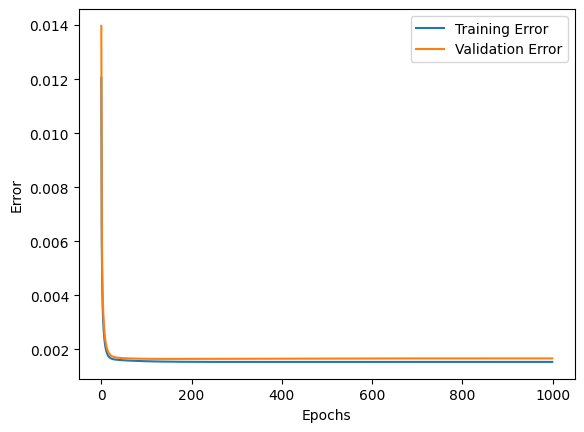

In [12]:
training_errors, validation_errors = model.loss_epochs()
plt.plot(training_error, label='Training Error')
plt.plot(validation_error, label='Validation Error')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

Part 3: Obtaining and comparing predictions using the three models (BP, BP-F, MLR-F)

To compute the quality of a prediction, we will use the mean absolute percentage error (MAPE), given by:
𝐸(%) = 100 ∑𝜇|(𝑦^𝜇 − 𝑧^𝜇)/𝑧^𝜇|

Where the best way to visualize the results is with scatter plots of the prediction value 𝑦^𝜇
compared with the real value z^𝜇. The closer the points are to the diagonal, the better the prediction.

Part 3.1: Parameter comparison and selection

In [ ]:
# We calculate the MAPE

In [ ]:
# Scatter plot of the prediction value vs real value

In [ ]:
# Evolution of the training and validation error as a function of the number of epochs

Part 3.2: Model result comparison

In [ ]:
# Multi-linear regression model from scikit-learn

In [ ]:
# A neural network model, which can be used from Tensorflow, Scikit-learn or any other python library